<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>
<h1>Integrierte Navigation - Tutorial 2: Micro Electro Mechanical Systems (MEMS)</h1>


# Description of the task
In this tutorial you'll be thought to post-process inertial measurement data. The lowest accuracy you'll get when you process data as they are. There are ways to get more accurate soltions (e.g. calibration of the IMU and Zero Velocity updates).

We provied necessary sensors so you could make your own measurements and evaluations in small groups. You should learn the complete workflow.

In the* moodle cours* you will find a guidance, how you connect the Arduino with the MPU and how you can receive and store data for further processing.

After installation from hardware and software as well as data acquisition there are severeal subtasks you have to do throughout the notebook. These tasks should help you to capture the complete workflow.

The notebook shows the workflow from data import, bias calculation and integration of the measured values to visualization and table length calculation. 

Subasks are built into the individual sections. A large part of the source code is already given, which is to be supplemented by you.
In task 7 you have a free hand to calculate your individual table length and to compare different sensor configurations.

# Importing necessary modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Tasks

## Data Upload

The recorded measurement data in an ASCII-file must be uploaded in your personal Google Drive and your jupither notebook needs to be access to your Google Drive.
1. Google Drive - upload your file via drag and drop.
2. Google Colaboratory - click on the folder icon on the left and then on the the Google Drive folder icon.
3. Google Colaboratory - allow the access in the pop up window.
4. Google Colaboratory - navigate to your uploaded file in the file explorer left.
5. Google Colaboratory - click on the three point next to your file and copy the file path. This you will need for Task 2.
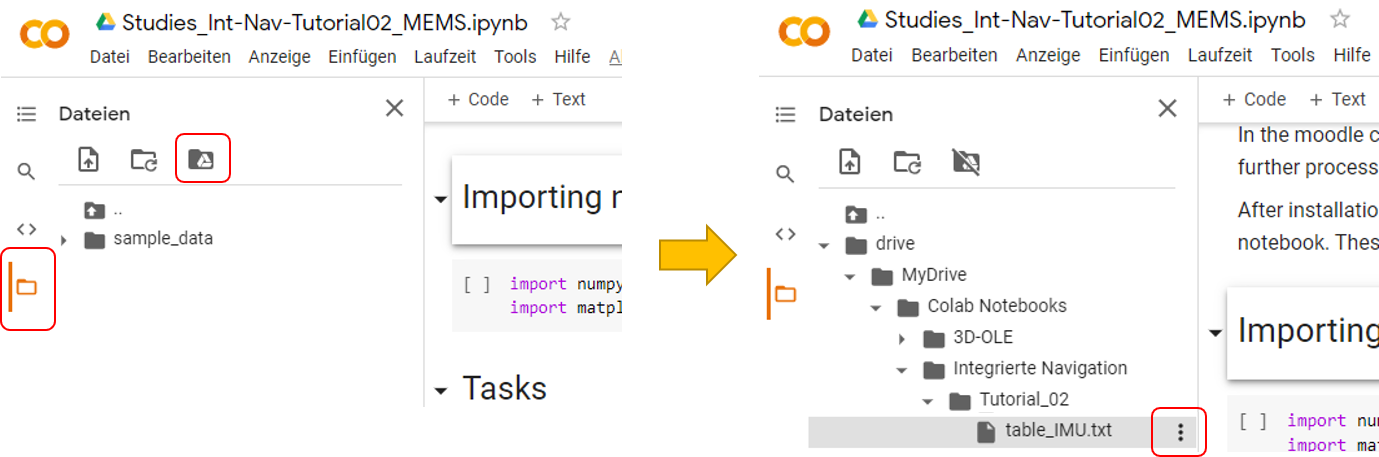

### Task 1
Do the upload according to the instructions above or use the jupiter notenbook offline.

## Import data
After the upload, we have to load the data in the notebook. It is practically to store all data in one array. The values for time, acceloration and turn rates seperated in differend collums and for each timestamp in seperate rows.

> *__Note__:* The timestamp is not unixtime, rather it is the time in milliseconds from the beginning of the script.

### Task 2
Programm the code for the import of your measurement data:

> *__Tipp__:* Change the [...] to your own values.

> *__Tipp__:* For that purpose you can use the function `loadtxt` from the `numpy` library.


In [ ]:
location = '...your file path from task 1 point 5...'
data = np.loadtxt(location, delimiter='...', skiprows=...)
# data[:,0] = TIME | data[:,1] = ACC_X | data[:,2] = ACC_Y | data[:,3] = ACC_Z | data[:,4] = GYR_X | data[:,5] = GYR_Y | data[:,6] = GYR_Z 

## Bias determination
After the import of the data, we have to determin the bias from a small dataset of the first values of the measurement. 
For that purpose you made the short initialisation break (approx. 10 to 20 sconds) in front of the movement along the table edge.

### Task 3
Programm the code for the bias determination of your measurement data:

> *__Tipp__:* Change the [...] to your own values.

> *__Tipp__:* The `numpy` library has also for that task an easy solution.

In [ ]:
value = ...
bias = np.array([np.mean(data[1:value,1]), np.mean(data[1:value,2]), ... ])
# bias[:,0] = ACC_X | bias[:,1] = ACC_Y | bias[:,2] = ACC_Z | bias[:,3] = GYR_X | bias[:,4] = GYR_Y | bias[:,5] = GYR_Z
# Acceloration in [m/s^2]
# Turning rates in [°/s]

## Integration of acceleration

### Velocity
Now we are going to integrate the accelerations to velocity by the given formula:

Formula for velocity:

\begin{equation*} v_i = v_0 + a_i * \Delta t  
\end{equation*}

With:
* $v_i$: velocity in $[m/s]$
* $v_0$: initial velocity $[m/s]$
* $a_i$: acceleration in $[m/s^2]$
* $\Delta t$: time difference to previous measurement $_{i-1}$ in $[s]$

### Position
Formula for position:

\begin{equation*}
s_i = s_0 + 0.5 * a_i * \Delta t^2 + v_0 * \Delta t 
\end{equation*}

With:
* $s_i$: distance $[m]$
* $s_0$: initial position $[m]$
* $a_i$: acceleration in $[m/s^2]$
* $\Delta t$: time difference to previous measurement $_{i-1}$ in $[s]$
* $v_0$: initial velocity $[m/s]$

### Task 4
Programm the code for the integration of acceleration to velocity and positions by the formulaes above:

> *__Tipp__:* Change the [...] to your own values.

> *__Tipp__:* For this task with many iterations, `loops` makes your live easier.

In [ ]:
x_v = np.zeros((3, len(data[:,0])))
x_d = np.zeros((3, len(data[:,0])))

for i in range(1, len(data[:,0])):
  dt = ...

  # velocity [m/s]
  x_v[0,i] = ...
  x_v[1,i] = ...
  x_v[2,i] = ...

  # distances [m]
  x_d[0,i] = ...
  x_d[1,i] = ...
  x_d[2,i] = ...

## Integration of turn rates
Next, we are going to intgrate the turn rates to angles with the formula for rotation angle:

\begin{equation*}
r_i = r_{i-1} + \omega_i * \Delta t
\end{equation*}

With:
* $r_i$: rotation angle
* $\Delta t$: time difference to previous measurement $_{i-1}$ in $[s]$
* $\omega_i$: rotation rate

### Task 5
Programm the code for the integration of turn rates to angles by the formulaes above:

> *__Tipp__:* Change the [...] to your own values.

> *__Tipp__:* Also `loops` saves lifetime for this task.

In [ ]:
euler = np.zeros((3, len(data[:,0])))

for i in range(1, len(data[:,0])):
  dt = ...

  # degree [°]
  euler[0,i] = ... # phi
  euler[1,i] = ... # theta
  euler[2,i] = ... # psi

## Data visualisation

### Task 6
Programm the code for the visualisation of your results. Make three seperate plots for the velocities, the positions and the turn rates. The plots should contain a title, axis labels and a legend.

> *__Tipp__:* Change the [...] to your own values and adapt it for the following plots.

> *__Tipp__:* The library `matplotlib` can be used to create fancy plots.

### Angles

In [ ]:
plt.plot(data[:,0]/1000, euler[0,:], label='phi')
plt.plot(...)
plt.plot(...)
plt.title('...')
plt.xlabel('...')
plt.ylabel('...')
plt.legend()
plt.grid()
plt.show()

### Velocity

In [ ]:
...

### Position

In [ ]:
...

## Table length determination
In the plot above regarding the position, hopefully you can see a straigt rising edge in one axis (x or y). This represents your moving direction along the table edge.

On basis of drifts, there is also a movement along the other axes possible and visible.

Now you can determin the table length with your measurement data. After that you can compare the result with the original length of your table.
At least you can do an asumption regarding the quality of your result with respect to the limits of the used system.

### Task 7
Programm the code for the determination of your table length.

> *__Tipp__:* Change the [...] to your own values.

> *__Tipp__:* Try again with the `numpy` library.


In [ ]:
# table length with Pythagorean theorem
table_length = np.sqrt(x_d[0,-1:]**2 + ... + ...)

'The length of my table is in real ... meter, but I have determined a length with my measurement from {:2.3} meter!'.format(float(table_length))